In [1]:
from google.colab import drive


drive.mount('noises/')
root_path = 'noises/My Drive/'  #change dir to your project folder

Mounted at noises/


In [ ]:
pwd

'/content'

In [2]:
%cd noises/MyDrive/

/content/noises/MyDrive


## Два аудио рядом: исходный (зашумленный), улучшенный, чистый

In [3]:
pip install pesq

  Created wheel for pesq: filename=pesq-0.0.2-cp36-cp36m-linux_x86_64.whl size=159943 sha256=950b621cf25930828ec8431724bf5f99d85c6f3b442872e84c0ef3275f706141
  Stored in directory: /root/.cache/pip/wheels/95/96/02/64c5b0ffb69c5651438f511679983a6ed3ef23873d2e9ecde4
Successfully built pesq


In [4]:
def Get_audio(str):
  from IPython.display import Audio
  au = Audio(str)
  return au

''' Метод, который возвращает строку в виде тега "audio", чтобы в дальнейшем отобразить его с помощью html '''
import gc
from IPython.display import HTML, Audio, display_html
def audio_player(audio_path):
    #print(audio_path)
    return '<audio src="{}" preload="none" controls="controls"></audio>'.format(audio_path)

''' Метод, который выводит файл .csv и созраняет его в типе данных pandas.dataset '''
import pandas as pd

''' Метод, который выводит содержимое текстовых файлов и отображает аудио '''

pd.set_option('display.max_colwidth', 3000)

def get_pesq(audio_cleared, audio_enhanced, wb):
  from scipy.io import wavfile
  from pesq import pesq
  rate, ref = wavfile.read(audio_cleared)
  rate, deg = wavfile.read(audio_enhanced)
  if wb==True:
    return (pesq(rate, ref, deg, 'wb'))
  else:
    return (pesq(rate, ref, deg, 'nb'))

def display_manifest(noised, enhanced, cleared):
    display_df = pd.DataFrame({'path_noised':[noised], 'path_enhanced': [enhanced],'path_clear':[cleared]})
    display_df['noised']=audio_player(noised)
    display_df['enhanced']=audio_player(enhanced)
    display_df['cleared']=audio_player(cleared)
    display_df['pesq'] = get_pesq(cleared,enhanced, wb=True)
    audio_style = '<style>audio {height:44px;border:0;padding:0 20px 0px;margin:-10px -20px -20px;}</style>'
    display_df = display_df[['path_noised', 'path_enhanced','path_clear', 'noised', 'enhanced', 'cleared', 'pesq']]
    display(HTML(audio_style + display_df.to_html(escape=False)))
    del display_df
    gc.collect()

In [5]:
def get_amplitudes(noised, enhanced, cleared):
    import soundfile as sf
    import librosa
    import librosa.display
    import matplotlib.pyplot as plt
    amplitudes_n,sample_rate = sf.read(noised)
    amplitudes_e,sample_rate = sf.read(enhanced)
    amplitudes_c,sample_rate = sf.read(cleared)
    fig = plt.figure(figsize=(25,60))
    plt.subplot(10,1,1)
    librosa.display.waveplot(amplitudes_n,sr=sample_rate)
    plt.title('noised_audio')
    plt.ylabel("Amplitude")
    plt.subplot(10,1,2)
    librosa.display.waveplot(amplitudes_e,sr=sample_rate)
    plt.title('enhanced_audio')
    plt.ylabel("Amplitude")
    plt.subplot(10,1,3)
    librosa.display.waveplot(amplitudes_c,sr=sample_rate)
    plt.title('clean_audio')
    plt.ylabel("Amplitude")
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()

In [112]:
def plot_specgram(noised, enhanced, cleared, NFFT=5000, t_min=0, t_max=3, noverlap=100):
    from matplotlib.pyplot import specgram
    import soundfile as sf
    import matplotlib.pyplot as plt
    amplitudes_n,sample_rate = sf.read(noised)
    amplitudes_e,sample_rate = sf.read(enhanced)
    amplitudes_c,sample_rate = sf.read(cleared)
    #fig = plt.figure(figsize=(25,60), dpi = 900)
    fig = plt.figure(figsize=(25,60))
    plt.subplot(10,1,1)
    specgram(amplitudes_n[t_min*16000:t_max*16000],NFFT,noverlap=noverlap, Fs=sample_rate,cmap='jet_r')
    plt.colorbar()
    plt.title('noised_audio')
    plt.ylabel("Frequency")
    plt.subplot(10,1,2)
    specgram(amplitudes_e[t_min*16000:t_max*16000],NFFT,noverlap=noverlap, Fs=sample_rate,cmap='jet_r')
    plt.colorbar()
    plt.title('enhanced_audio')
    plt.ylabel("Frequency")
    plt.subplot(10,1,3)
    specgram(amplitudes_c[t_min*16000:t_max*16000],NFFT,noverlap=noverlap, Fs=sample_rate,cmap='jet_r')
    plt.colorbar()
    plt.title('cleaned_audio')
    plt.ylabel("Frequency")
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

In [94]:
def plot_specshow(noised, enhanced, cleared, y_axis='log', title='Log power', hop_length=512, n_fft=500):
    from matplotlib.pyplot import specgram
    import soundfile as sf
    import librosa.display
    import numpy as np
    import matplotlib.pyplot as plt
    amplitudes_n,sample_rate = sf.read(noised)
    amplitudes_e,sample_rate = sf.read(enhanced)
    amplitudes_c,sample_rate = sf.read(cleared)
    #fig = plt.figure(figsize=(25,60), dpi = 900)
    fig = plt.figure(figsize=(25,60))
    plt.subplot(10,1,1)
    D = librosa.core.amplitude_to_db(np.abs(librosa.stft(amplitudes_n,hop_length=hop_length, n_fft=n_fft))**2, ref=np.max)
    n1=librosa.display.specshow(D,x_axis='time' ,y_axis=y_axis)
    fig.colorbar(n1, format="%+2.f dB")
    plt.title('noised_audio')
    plt.subplot(10,1,2)
    D = librosa.core.amplitude_to_db(np.abs(librosa.stft(amplitudes_e,hop_length=hop_length, n_fft=n_fft))**2, ref=np.max)
    n2=librosa.display.specshow(D,x_axis='time' ,y_axis=y_axis)
    fig.colorbar(n2, format="%+2.f dB")
    plt.title('enhanced_audio')
    plt.subplot(10,1,3)
    D = librosa.core.amplitude_to_db(np.abs(librosa.stft(amplitudes_c,hop_length=hop_length, n_fft=n_fft))**2, ref=np.max)
    n3=librosa.display.specshow(D,x_axis='time' ,y_axis=y_axis)
    fig.colorbar(n3, format="%+2.f dB")
    plt.title('cleaned_audio')
    plt.suptitle("Figure 3: {} spectrogram".format(title),x=0.5, y=0.915,fontsize=18)
    
    plt.show()

In [95]:
def load_sound_files(files):
    raw_sounds = []
    for fp in files:
        X,sr = sf.read(fp)
        raw_sounds.append(X)
    return raw_sounds

In [96]:
def Spectral_centroid(noised, enhanced, cleaned):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa

    x_n , sr = librosa.load(noised) #n-мерный массив float32 и частота дискретизации
    spectral_centroids_n = librosa.feature.spectral_centroid(x_n, sr=sr)[0]
    # Вычисление временной переменной для визуализации
    fig = plt.figure(figsize=(25,60))
    ax1 = plt.subplot(10,1,1)
    frames = range(len(spectral_centroids_n))
    t = librosa.frames_to_time(frames)
    librosa.display.waveplot(x_n, sr=sr, alpha=0.4)
    spectral_rolloff_n = librosa.feature.spectral_rolloff(x_n+0.01, sr=sr)[0]
    plt.plot(t, normalize(spectral_rolloff_n), color='r',label='spectral_fall')
    plt.plot(t, normalize(spectral_centroids_n), color='b',label='Spectral_centroid')
    plt.title('noised_audio')
    plt.ylabel("Frequency")
    ax1.legend()
    
    x_e , sr = librosa.load(enhanced) #n-мерный массив float32 и частота дискретизации
    spectral_centroids_e = librosa.feature.spectral_centroid(x_e, sr=sr)[0]
    # Вычисление временной переменной для визуализации
    fig = plt.figure(figsize=(25,60))
    ax2=plt.subplot(10,1,2)
    librosa.display.waveplot(x_e, sr=sr, alpha=0.4)
    spectral_rolloff_e = librosa.feature.spectral_rolloff(x_e+0.01, sr=sr)[0]
    plt.plot(t, normalize(spectral_rolloff_e), color='r',label='spectral_fall')
    plt.plot(t, normalize(spectral_centroids_e), color='b',label='Spectral_centroid')
    plt.title('enhanced_audio')
    plt.ylabel("Frequency")
    ax2.legend()

    x_c , sr = librosa.load(cleaned) #n-мерный массив float32 и частота дискретизации
    spectral_centroids_c = librosa.feature.spectral_centroid(x_c, sr=sr)[0]
    # Вычисление временной переменной для визуализации
    fig = plt.figure(figsize=(25,60))
    ax3=plt.subplot(10,1,3)
    librosa.display.waveplot(x_c, sr=sr, alpha=0.4)
    spectral_rolloff_c = librosa.feature.spectral_rolloff(x_c+0.01, sr=sr)[0]
    plt.plot(t, normalize(spectral_rolloff_c), color='r',label='spectral_fall')
    plt.plot(t, normalize(spectral_centroids_c), color='b', label='Spectral_centroid')
    plt.title('cleaned_audio')
    plt.ylabel("Frequency")
    ax3.legend()
  # Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    import sklearn
    return sklearn.preprocessing.minmax_scale(x)
  # Построение спектрального центроида вместе с формой волны

In [97]:
def get_mfss_plot(noised, enhanced, cleaned, fs=5):
    import matplotlib.pyplot as plt
    import librosa
    import librosa.display
    fig = plt.figure(figsize=(25,60))
    ax1 = plt.subplot(10,1,1)
    plt.title('noised_audio')
    x_n, sr = librosa.load(noised)
    mfccs_n = librosa.feature.mfcc(x_n, sr=fs)
    n1=librosa.display.specshow(mfccs_n, sr=sr, x_axis='time')
    fig.colorbar(n1, format="%+2.f dB")
    ax2 = plt.subplot(10,1,2)
    x_e, sr = librosa.load(enhanced)
    plt.title('enhanced_audio')
    mfccs_e = librosa.feature.mfcc(x_e, sr=fs)
    n2=librosa.display.specshow(mfccs_e, sr=sr, x_axis='time')
    fig.colorbar(n2, format="%+2.f dB")
    ax3 = plt.subplot(10,1,3)
    plt.title('cleaned_audio')
    x_c, sr = librosa.load(cleaned)
    mfccs_c = librosa.feature.mfcc(x_c, sr=fs)
    n3=librosa.display.specshow(mfccs_c, sr=sr, x_axis='time')
    fig.colorbar(n3, format="%+2.f dB")

In [98]:
def slice_into_frames(amplitudes, window_length, hop_length):
    import numpy as np
    import librosa
    return librosa.core.spectrum.util.frame(
        np.pad(amplitudes, int(window_length // 2), mode='reflect'),
        frame_length=window_length, hop_length=hop_length)
    # выход: [window_length, num_windows]

In [99]:
def get_STFT(amplitudes, window_length, hop_length):
    import librosa
    import numpy as np
    """ Compute short-time Fourier Transform """
    # разбиваем амплитуды на пересекающиеся фреймы [window_length, num_frames]
    frames = slice_into_frames(amplitudes, window_length, hop_length)
    
    # получаем веса для Фурье, float[window_length]
    fft_weights = librosa.core.spectrum.get_window('hann', window_length, fftbins=True)
    
    # применяем преобразование Фурье
    stft = np.fft.rfft(frames * fft_weights[:, None], axis=0)
    
    return stft

In [100]:
def get_melspectrogram(amplitudes, sample_rate=16000, n_mels=128,
                       window_length=1024, hop_length=512, fmin=1, fmax=100):
    import numpy as np
    import librosa
    """
    Implement mel-spectrogram as described above.
    :param amplitudes: float [num_amplitudes]
    :param sample rate: число отсчетов каждую секунду
    :param n_mels: число каналов спектрограммы
    :param window_length: параметр размера окна для Фурье
    :param hop_length: размер пересечения 
    :param f_min: мин частота
    :param f_max: макс частота
    :returns: мел-scaled спектрограмма [n_mels, duration]
    """
    
    # Шаг 1
    stft = get_STFT(amplitudes, window_length, hop_length)
    assert stft.shape == (window_length // 2 + 1, len(amplitudes) // 512 + 1)
    
    # Шаг 2
    spectrogram = np.abs(stft ** 2)
    
    # Шаг 3
    mel_basis = librosa.filters.mel(sample_rate, n_fft=window_length,
                                    n_mels=n_mels, fmin=fmin, fmax=fmax)
    # ^-- matrix [n_mels, window_length / 2 + 1]
    
    mel_spectrogram = np.dot(mel_basis, spectrogram)
    assert mel_spectrogram.shape == (n_mels, len(amplitudes) // 512 + 1)
    
    return mel_spectrogram
    

In [101]:
def Mel_frequency_plot(noised, enhanced, cleaned):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa
    fig = plt.figure(figsize=(25,60))
    x_n , sr = librosa.load(noised) #n-мерный массив float32 и частота дискретизации
    ax1=plt.subplot(10,1,1)
    plt.imshow(get_melspectrogram(x_n).transpose())
    plt.title("Noised"); plt.xlabel("Time"); plt.ylabel("Frequency")

    x_e , sr = librosa.load(enhanced) #n-мерный массив float32 и частота дискретизации
    ax2=plt.subplot(10,1,2)
    plt.imshow(get_melspectrogram(x_e).transpose())
    plt.title("enhanced"); plt.xlabel("Time"); plt.ylabel("Frequency")

    x_c , sr = librosa.load(noised) #n-мерный массив float32 и частота дискретизации
    ax3=plt.subplot(10,1,3)
    plt.imshow(get_melspectrogram(x_c).transpose())
    plt.title("cleaned"); plt.xlabel("Time"); plt.ylabel("Frequency")
    plt.show()

In [102]:
def persistance_plot(noised, enhanced, cleaned,sample_rate=16000, n_mels=128,
                       window_length=1024, hop_length=512, fmin=1, fmax=8192):
    import matplotlib.pyplot as plt
    import soundfile as sf
    import librosa.display
    import numpy as np
    import matplotlib.pyplot as plt
    amplitudes_n,sample_rate = sf.read(noised)
    amplitudes_e,sample_rate = sf.read(enhanced)
    amplitudes_c,sample_rate = sf.read(cleaned)
    #fig = plt.figure(figsize=(25,60), dpi = 900)
    fig = plt.figure(figsize=(25,60))
    plt.subplot(10,1,1)
    D = librosa.core.amplitude_to_db(np.abs(librosa.stft(amplitudes_n,hop_length=hop_length))**2, ref=np.max)
    frec = np.fft.fft(amplitudes_n)/np.max(amplitudes_n)
    plt.specgram(D,Fs=16000)

In [103]:
def frequency_spectogram(noised, enhanced, cleaned,window_length=1024, hop_length=512, fmin=50, fmax=250, t_min=0, t_max=2, dt=0.001):
    import matplotlib.pyplot as plt
    import librosa
    import numpy as np
    rate, ref = librosa.load(cleaned)
    t=np.arange(t_min,t_max,dt)
    fig = plt.figure(figsize=(25,60))
    plt.specgram(ref,NFFT=128,Fs = rate, noverlap=120,c_map='jet_r')
    plt.colorbar()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Audio Spectrogram')
    plt.show()

In [104]:
def get_audio_hearing(noised, enhanced, cleaned):
    display_manifest(noised, enhanced, cleaned)
    get_amplitudes(noised, enhanced, cleaned)
    plot_specgram(noised, enhanced, cleaned)
    #plot_specshow(noised, enhanced, cleaned)
    #plot_specshow(noised, enhanced, cleaned, y_axis='tempo', title='tempogram')
    #plot_specshow(noised, enhanced, cleaned, y_axis='linear', title='linear')
    #plot_specshow(noised, enhanced, cleaned, y_axis='mel', title='mel')
    #plot_specshow(noised, enhanced, cleaned, y_axis='cqt_hz', title='cqt_hz')
    #Spectral_centroid(noised, enhanced, cleaned)
    #Mel_frequency_plot(noised, enhanced, cleaned)
    #get_mfss_plot(noised, enhanced, cleaned)

,path_noised,path_enhanced,path_clear,noised,enhanced,cleared,pesq
0,noisy_31_01/test/pistol3_e20dccaed709.wav,denoiser_project/denoiser/outputs_test/pistol3_e20dccaed709_enhanced.wav,clean_31_01/test/pistol3_e20dccaed709.wav,,,,1.228005


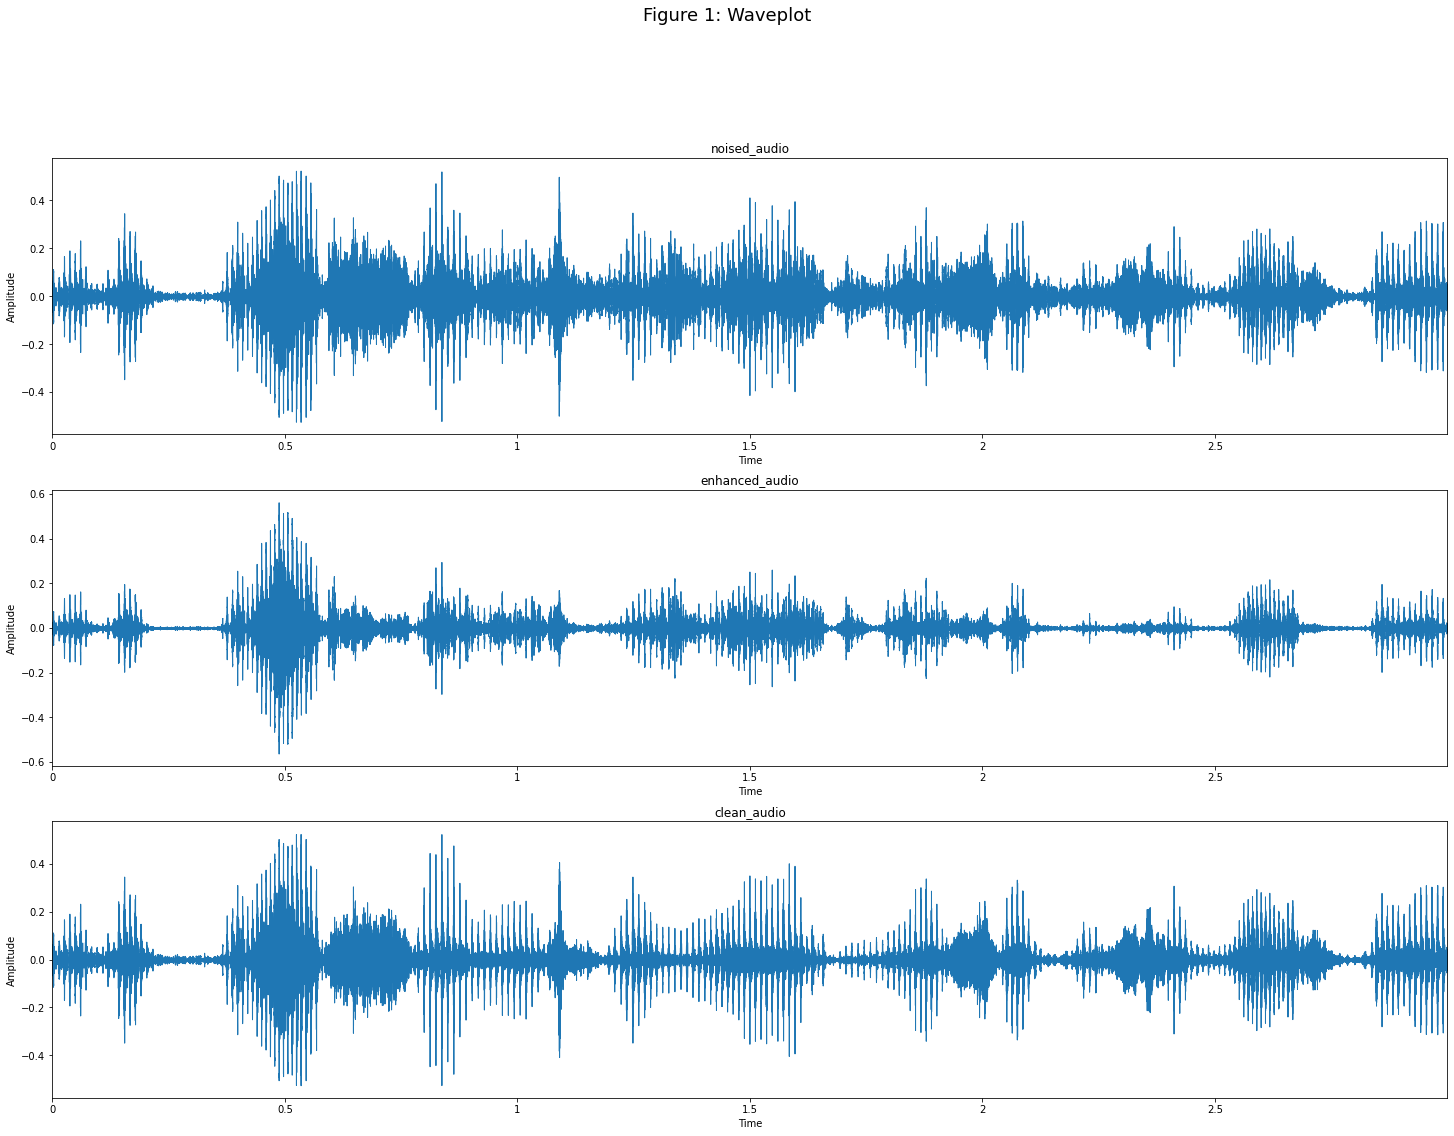

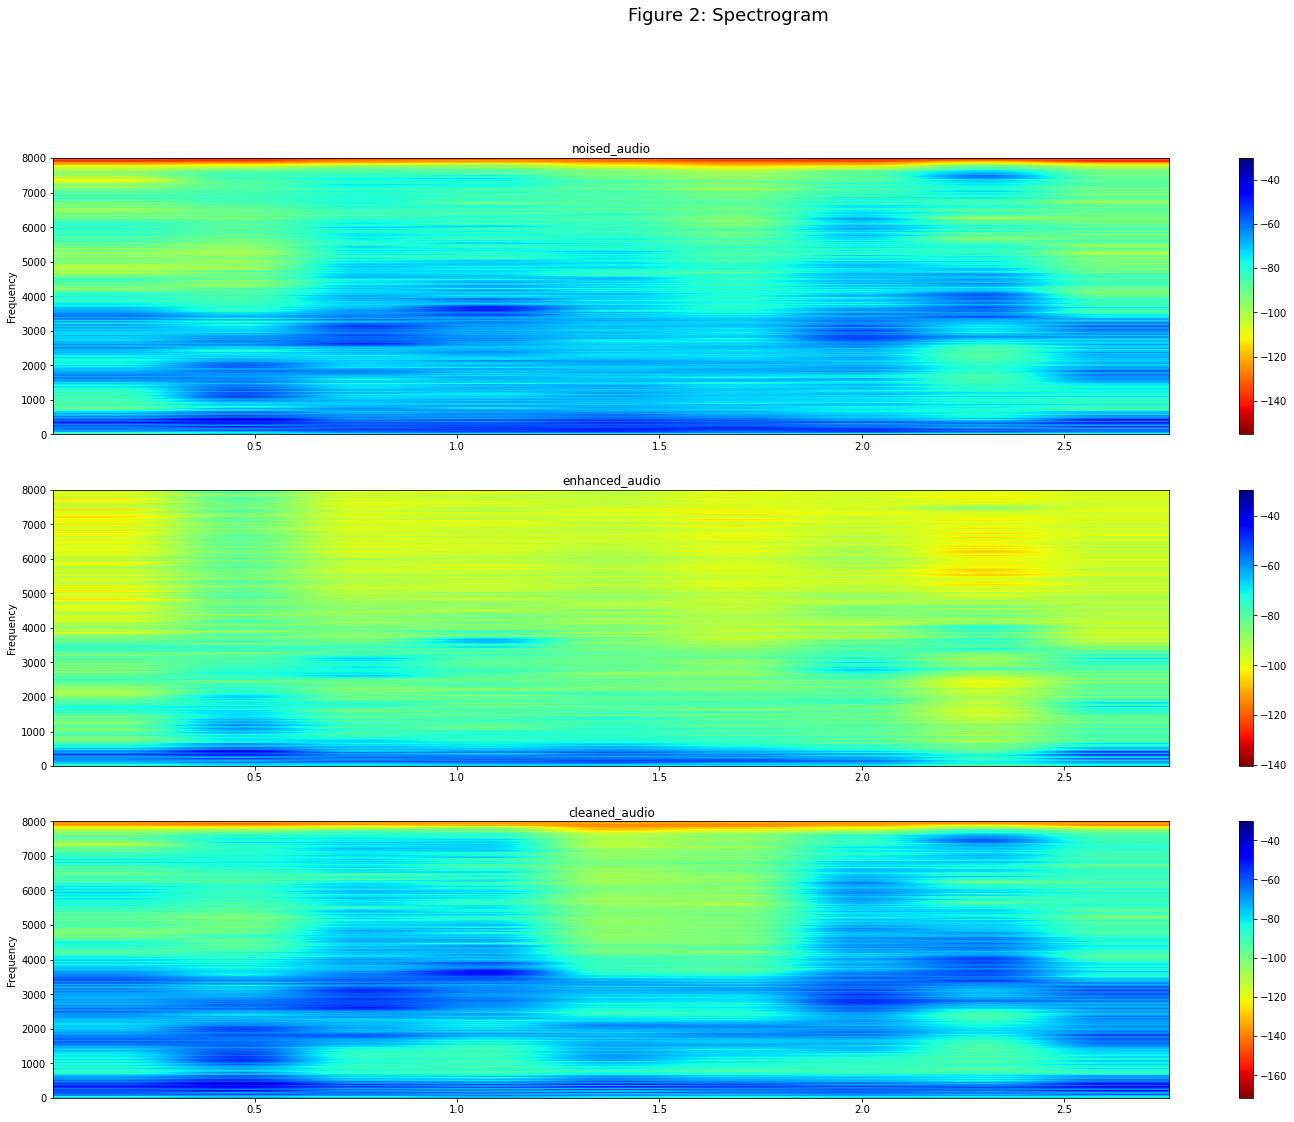

In [113]:
get_audio_hearing('noisy_31_01/test/pistol3_e20dccaed709.wav', 'denoiser_project/denoiser/outputs_test/pistol3_e20dccaed709_enhanced.wav','clean_31_01/test/pistol3_e20dccaed709.wav')

Понижение шума в аудио

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


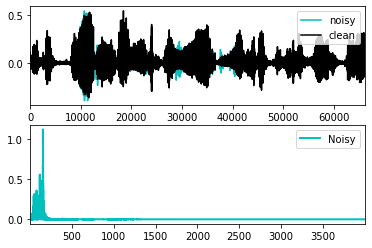

In [130]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
x, sr = librosa.load('denoiser_project/denoiser/outputs_test/pistol3_e20dccaed709_enhanced.wav')# clean_31_01/test/pistol3_e20dccaed709.wav
x_c, sr_c = librosa.load('clean_31_01/test/pistol3_e20dccaed709.wav')
t=np.arange(0,len(x))
fhat=np.fft.fft(x, len(x))
PSD=fhat*np.conj(fhat)/len(x)
freq = (1/((2/16000)*len(x)))*np.arange(len(x))
L=np.arange(1,np.floor(len(x)/2), dtype='int')
fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,x,color='c', LineWidth=1.5,label='noisy')
plt.plot(t,x_c, color='k',LineWidth=1.5, label='clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L],color='c',LineWidth=2, label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])

plt.legend()
plt.show()

In [131]:
indices = PSD>100
PSDclean=PSD*indices
fhat=indices*fhat
ffilt=np.fft.ifft(fhat)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


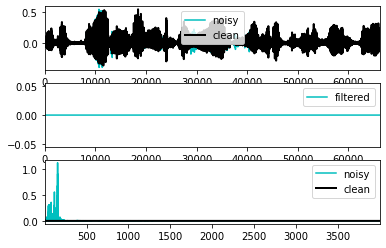

In [135]:
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t,x,color='c', LineWidth=1.5, label='noisy')
plt.plot(t,x_c,color='k', LineWidth=2,label='clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='c', LineWidth=1.5, label='filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c', LineWidth=1.5, label='noisy')
plt.plot(freq[L],PSDclean[L],color='k', LineWidth=2,label='clean')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.show()